### RQ 6
### Data Analysis Using Apache Spark

For the data analysis, the **Apache Spark** library was utilized, a powerful and scalable framework designed for processing large datasets. Spark offers a suite of tools that allows for the efficient management of extensive data, leveraging parallelization and in-memory processing.

In particular, Spark's SQL interface was employed to facilitate data manipulation and analysis. By integrating SQL, it became possible to group and aggregate information in a structured manner, ensuring greater clarity and organization in the analysis. This approach allowed for executing complex queries intuitively and simplified the extraction of meaningful insights from the data, enhancing the overall effectiveness of the analytical process.

The use of Spark not only improved computational performance but also provided the necessary flexibility to tackle the challenges associated with managing variable data volumes, making the workflow more agile and responsive to the project's needs.


In [7]:
GDRIVE_DIR = "/content/drive"
GDRIVE_HOME_DIR = GDRIVE_DIR + "/MyDrive"
path= GDRIVE_HOME_DIR + "/hw_2/steam_reviews.csv"

In [8]:
!pip install pyspark
# Alternatively, if you want to install a specific version of pyspark:
#!pip install pyspark==3.2.1
!pip install -U -q PyDrive # To use files that are stored in Google Drive directly (e.g., without downloading them from an external URL)
!apt install openjdk-8-jdk-headless -qq


The following additional packages will be installed:
  libxtst6 openjdk-8-jre-headless
Suggested packages:
  openjdk-8-demo openjdk-8-source libnss-mdns fonts-dejavu-extra fonts-nanum fonts-ipafont-gothic
  fonts-ipafont-mincho fonts-wqy-microhei fonts-wqy-zenhei fonts-indic
The following NEW packages will be installed:
  libxtst6 openjdk-8-jdk-headless openjdk-8-jre-headless
0 upgraded, 3 newly installed, 0 to remove and 49 not upgraded.
Need to get 39.6 MB of archives.
After this operation, 144 MB of additional disk space will be used.
Selecting previously unselected package libxtst6:amd64.
(Reading database ... 123623 files and directories currently installed.)
Preparing to unpack .../libxtst6_2%3a1.2.3-1build4_amd64.deb ...
Unpacking libxtst6:amd64 (2:1.2.3-1build4) ...
Selecting previously unselected package openjdk-8-jre-headless:amd64.
Preparing to unpack .../openjdk-8-jre-headless_8u422-b05-1~22.04_amd64.deb ...
Unpacking openjdk-8-jre-headless:amd64 (8u422-b05-1~22.04) ...
Sel

In [4]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import pyspark
from pyspark.sql import *
from pyspark.sql.types import *
from pyspark.sql.functions import *
from pyspark import SparkContext, SparkConf

In [5]:
# Create the session
conf = SparkConf().\
                set('spark.ui.port', "4050").\
                set('spark.executor.memory', '4G').\
                set('spark.driver.memory', '45G').\
                set('spark.driver.maxResultSize', '10G').\
                setAppName("shotcafeDataExploration").\
                setMaster("local[*]")

# Create the context
sc = pyspark.SparkContext(conf=conf)
spark = SparkSession.builder.getOrCreate()

In [9]:
# Point Colaboratory to our Google Drive
from google.colab import drive

drive.mount(GDRIVE_DIR, force_remount=True)

Mounted at /content/drive


In [10]:
#The csv file containing the main information of the shotcafe is loaded into a SparkDataframe
steam_df = spark.read \
            .format("csv") \
            .option("header", "true") \
            .load(path)

In [11]:
steam_df.printSchema()


root
 |-- _c0: string (nullable = true)
 |-- app_id: string (nullable = true)
 |-- app_name: string (nullable = true)
 |-- review_id: string (nullable = true)
 |-- language: string (nullable = true)
 |-- review: string (nullable = true)
 |-- timestamp_created: string (nullable = true)
 |-- timestamp_updated: string (nullable = true)
 |-- recommended: string (nullable = true)
 |-- votes_helpful: string (nullable = true)
 |-- votes_funny: string (nullable = true)
 |-- weighted_vote_score: string (nullable = true)
 |-- comment_count: string (nullable = true)
 |-- steam_purchase: string (nullable = true)
 |-- received_for_free: string (nullable = true)
 |-- written_during_early_access: string (nullable = true)
 |-- author.steamid: string (nullable = true)
 |-- author.num_games_owned: string (nullable = true)
 |-- author.num_reviews: string (nullable = true)
 |-- author.playtime_forever: string (nullable = true)
 |-- author.playtime_last_two_weeks: string (nullable = true)
 |-- author.playt

In [12]:
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField, StringType, IntegerType, FloatType

# Initialize Spark session
spark = SparkSession.builder.master("local").appName("SteamReviewsSchema").getOrCreate()

# Define the schema
schema = StructType([
    StructField("_c0", StringType(), True),
    StructField("app_id", StringType(), True),
    StructField("app_name", StringType(), True),
    StructField("review_id", StringType(), True),
    StructField("language", StringType(), True),
    StructField("review", StringType(), True),
    StructField("timestamp_created", StringType(), True),
    StructField("timestamp_updated", StringType(), True),
    StructField("recommended", StringType(), True),
    StructField("votes_helpful", IntegerType(), True),
    StructField("votes_funny", IntegerType(), True),
    StructField("weighted_vote_score", FloatType(), True),
    StructField("comment_count", IntegerType(), True),
    StructField("steam_purchase", StringType(), True),
    StructField("received_for_free", StringType(), True),
    StructField("written_during_early_access", StringType(), True),
    StructField("author.steamid", StringType(), True),
    StructField("author.num_games_owned", IntegerType(), True),
    StructField("author.num_reviews", IntegerType(), True),
    StructField("author.playtime_forever", FloatType(), True),
    StructField("author.playtime_last_two_weeks", FloatType(), True),
    StructField("author.playtime_at_review", FloatType(), True),
    StructField("author.last_played", IntegerType(), True)
])

# Load the dataset with options for handling line breaks and escape characters
  # Replace with the actual path
df_review = (spark.read.format("csv")
      .schema(schema)
      .option("header", "true")
      .option("multiLine", "true")  # Allows multi-line fields
      .option("escape", "\"")       # Escape character
      .option("quote", "\"")        # Quote character to handle fields with commas and dots
      .option("delimiter", ",")     # Ensure the correct delimiter is used
      .load(path))

# Display the DataFrame to verify the schema application
df_review.show(20, truncate=False)

+---+------+------------------------+---------+--------+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-----------------+-----------------+-----------+-------------+-----------+-------------------+-------------+--------------+-----------------+---------------------------+-----------------+----------------------+------------------+-----------------------+------------------------------+-------------------------+------------------+
|_c0|app_id|app_name                |review_id|language|review                                                                                                                                                               

In [13]:
from pyspark.sql import functions as F

# 1. Create a column "is_updated" to indicate whether the review has been updated.

df_review = df_review.withColumn(
    "is_updated",
    F.when(F.col("timestamp_created") != F.col("timestamp_updated"), 1).otherwise(0)
)

# 2. Calculate the probability of updating for each language group.
result = df_review.groupBy("language").agg(
    F.avg("is_updated").alias("update_probability")
)



In [14]:
# Filter only the rows for "English" and "Spanish."
result_filtered = result.filter(F.col("language").isin("english", "spanish"))

# show the result.
result_filtered.show()


+--------+-------------------+
|language| update_probability|
+--------+-------------------+
| spanish|0.09935080902965622|
| english|0.11894769277200401|
+--------+-------------------+



From the data provided, it appears that English users are slightly more likely to modify or update their reviews after submission, with a percentage of 0.11 compared to 0.099 for Spanish users. Although the difference may seem minimal, it suggests that English users might be more attentive or engaged in keeping their reviews current.


In [15]:


from pyspark.sql import functions as F

#Rename the column author.num_games_owned to num_games_owned for easier use.
df_review = df_review.withColumnRenamed("author.num_games_owned", "num_games_owned")


#Filter for reviews in English and Spanish.
filtered_df = df_review.filter((F.col("language") == "english") | (F.col("language") == "spanish"))

#Convert the column num_games_owned to an integer and calculate the average, grouping by language.
average_games_by_language = filtered_df \
    .withColumn("num_games_owned", F.col("num_games_owned").cast("int")) \
    .groupBy("language") \
    .agg(F.avg("num_games_owned").alias("average_num_games_owned"))

#show result
average_games_by_language.show()





+--------+-----------------------+
|language|average_num_games_owned|
+--------+-----------------------+
| spanish|     121.91626051246742|
| english|     166.82862131586393|
+--------+-----------------------+



In [16]:
from pyspark.sql import functions as F

#Rename the column author.num_reviews to num_reviews for easier use.
df_review = df_review.withColumnRenamed("author.num_reviews", "num_reviews")

#Filter for reviews in English and Spanish.
filtered_df = df_review.filter((F.col("language") == "english") | (F.col("language") == "spanish"))

#Convert the column num_reviews to an integer and calculate the average, grouping by language.
average_reviews_by_language = filtered_df \
    .withColumn("num_reviews", F.col("num_reviews").cast("int")) \
    .groupBy("language") \
    .agg(F.avg("num_reviews").alias("average_num_reviews"))

#show result
average_reviews_by_language.show()


+--------+-------------------+
|language|average_num_reviews|
+--------+-------------------+
| spanish|  9.387421924949589|
| english| 11.929542368399312|
+--------+-------------------+



### Interpretation of Results

The results indicate a significant difference in the behavior of Steam users between English and Spanish players. English users own an average of 167 games but write reviews for only 12 of them, suggesting a relatively low engagement in writing reviews compared to their game library. This may imply that while users are enthusiastic about video games and accumulate many titles, they do not feel motivated or interested in sharing their opinions on them.

On the other hand, Spanish users own an average of 122 games and write reviews for 9 of them. Again, the ratio of reviewed games to total games is low, but the number of games reviewed per user is lower compared to English users. This may reflect a different approach to sharing gaming experiences or a lesser availability of time to write reviews.

Overall, the data suggests that regardless of the number of games owned, Steam users tend to write reviews for a small fraction of the games they play, indicating that there may be factors limiting their willingness to provide feedback, such as lack of time, motivation, or a habit of not actively participating in online reviews.


### RQ7

In [17]:


#Filter the reviews that have at least one helpful vote.
reviews_with_helpful_votes = df_review.filter(F.col("votes_helpful").cast("int") >= 1).count()

#Calculate the total number of reviews.
total_reviews = df_review.count()

# calculate probability
probability_helpful_vote = reviews_with_helpful_votes / total_reviews

# show result
print(f"The probability of receiving at least one helpful vote is.: {probability_helpful_vote:.2%}")


The probability of receiving at least one helpful vote is.: 28.07%


### The probability of receiving at least one helpful vote is.: 28.07%

In [18]:

# Filter for non-recommended reviews with at least one helpful vote
non_recommended_helpful_reviews = df_review.filter(
    (F.col("recommended") == False) & (F.col("votes_helpful").cast("int") >= 1)
).count()

# Calculate the total number of non-recommended reviews
total_non_recommended_reviews = df_review.filter(F.col("recommended") == False).count()

# Calculate the conditional probability
probability_non_recommended_helpful = non_recommended_helpful_reviews / total_non_recommended_reviews

# Display the result
print(f"The probability of receiving at least one helpful vote for a non-recommended review is: {probability_non_recommended_helpful:.2%}")


The probability of receiving at least one helpful vote for a non-recommended review is: 48.46%


### The probability of receiving at least one helpful vote for a non-recommended review is: 48.46%

In [22]:
from pyspark.sql import functions as F
import builtins

# Rename the column temporarily for easier access
df_review = df_review.withColumnRenamed("author.num_reviews", "num_reviews")

# Define conditions for Events A and B
condition_A = F.col("votes_helpful").cast("int") >= 1  # Event A: at least one helpful vote
condition_B = F.col("num_reviews").cast("int") >= 5    # Event B: at least five reviews by the author

# Total number of reviews
total_reviews = df_review.count()

# Calculate probabilities
count_A = df_review.filter(condition_A).count()
count_B = df_review.filter(condition_B).count()
count_A_and_B = df_review.filter(condition_A & condition_B).count()

# Convert counts to probabilities (as floats)
probability_A = count_A / total_reviews
probability_B = count_B / total_reviews
probability_A_and_B = count_A_and_B / total_reviews

# Check independence
independence_check = probability_A * probability_B
# Use Python's built-in abs() function for float comparison
is_independent = builtins.abs(probability_A_and_B - independence_check) < 1e-5  # Small tolerance for floating-point comparison

# Display results
print(f"P(A) (review has at least one helpful vote): {probability_A:.4f}")
print(f"P(B) (reviewer has submitted at least five reviews): {probability_B:.4f}")
print(f"P(A ∩ B) (review has at least one helpful vote AND reviewer has submitted at least five reviews): {probability_A_and_B:.4f}")
print(f"P(A) * P(B): {independence_check:.4f}")
print(f"Are the events independent? {'Yes' if is_independent else 'No'}")

P(A) (review has at least one helpful vote): 0.2807
P(B) (reviewer has submitted at least five reviews): 0.4555
P(A ∩ B) (review has at least one helpful vote AND reviewer has submitted at least five reviews): 0.1564
P(A) * P(B): 0.1279
Are the events independent? No


# Output Results Interpretation

## P(A) (review has at least one helpful vote): 0.2807
This value indicates that approximately 28.07% of the reviews in the dataset have received at least one helpful vote. This suggests that a significant portion of the reviews is considered useful by readers.

## P(B) (reviewer has submitted at least five reviews): 0.4555
This value shows that 45.55% of the authors of the reviews have written at least five previous reviews. It indicates a notable level of participation from authors in leaving multiple reviews.

## P(A ∩ B) (review has at least one helpful vote AND reviewer has submitted at least five reviews): 0.1564
Here, the value of 15.64% represents the proportion of reviews that have received at least one helpful vote and were written by authors who have made at least five reviews. It is a joint measure that highlights how often both conditions are true simultaneously.

## P(A) * P(B): 0.1279
This value represents the product of the probabilities P(A) and P(B). If events A and B were independent, we would expect the probability of both events occurring (P(A ∩ B)) to equal this product. In other words, 12.79% of the reviews should theoretically have at least one helpful vote and come from authors with at least five reviews if the events were independent.

## Are the events independent? No
The independence test is based on comparing P(A ∩ B) with P(A) * P(B). Since P(A ∩ B) (0.1564) is significantly greater than P(A) * P(B) (0.1279), the events are not independent. This means there is a correlation between having helpful votes on reviews and the authors who have written more than five reviews. In other words, if an author has written at least five reviews, it is more likely that their reviews will receive helpful votes.




In [23]:
from pyspark.sql import functions as F

# Rename columns for easier access if not done yet
df_review = df_review.withColumnRenamed("author.num_games_owned", "num_games_owned")
df_review = df_review.withColumnRenamed("author.num_reviews", "num_reviews")

# Filter out rows with null or non-numeric values in num_games_owned and num_reviews
filtered_df = df_review \
    .filter(F.col("num_games_owned").isNotNull() & F.col("num_reviews").isNotNull()) \
    .withColumn("num_games_owned", F.col("num_games_owned").cast("int")) \
    .withColumn("num_reviews", F.col("num_reviews").cast("int"))

# Calculate the correlation between num_games_owned and num_reviews
correlation = filtered_df.stat.corr("num_games_owned", "num_reviews")

# Display the result
print(f"Correlation between number of games owned and number of reviews: {correlation:.4f}")

# Interpretation based on the correlation value
if correlation < -0.5:
    print("There is a significant negative correlation, supporting the hypothesis.")
elif correlation > -0.5 and correlation < 0.5:
    print("There is a weak or no correlation, which does not support the hypothesis.")
else:
    print("There is a positive correlation, refuting the hypothesis.")


Correlation between number of games owned and number of reviews: 0.3319
There is a weak or no correlation, which does not support the hypothesis.


## Interpretation

### Correlation Value (0.3319)
The correlation coefficient of **0.3319** suggests a weak positive correlation between the number of games owned and the number of reviews. This means that, contrary to the hypothesis, owning more games is slightly associated with writing more reviews, though the relationship is weak.

### Hypothesis Evaluation
The hypothesis was: “Reviewers who own a larger number of games are likely to leave fewer reviews on the platform.”

Since the correlation is **positive** (rather than negative, as the hypothesis suggested) and relatively **weak**, the hypothesis does not hold based on this data. A negative correlation would have aligned more with the hypothesis.

### Conclusion
There is **no evidence** to support the hypothesis that owning more games leads to fewer reviews.  
Instead, there’s a small positive correlation, implying that users with more games may actually write slightly more reviews, although this trend is weak and not very pronounced.

### Note on Interpretation
A correlation value of **0.3319** indicates only a weak association. So, while it technically refutes the hypothesis, it’s also **not strong enough to conclude a meaningful positive relationship** between games owned and reviews written.


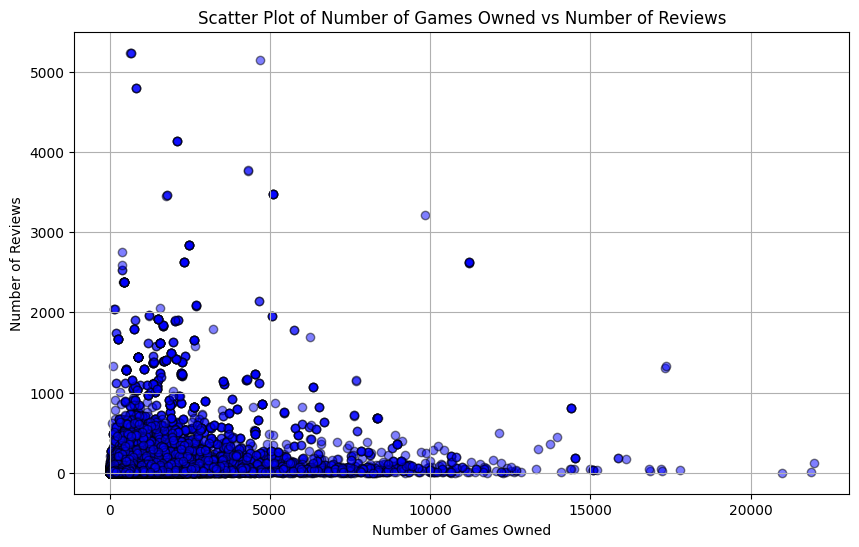

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter and sample data (only need the necessary columns and remove nulls)
sample_df = filtered_df \
    .select("num_games_owned", "num_reviews") \
    .filter(F.col("num_games_owned").isNotNull() & F.col("num_reviews").isNotNull()) \
    .sample(fraction=0.1, seed=42)  # Adjust fraction as needed for visualization

# Collect the sample to a pandas DataFrame
sample_pd_df = sample_df.toPandas()

# Plot the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(sample_pd_df["num_games_owned"], sample_pd_df["num_reviews"], alpha=0.5, color='b', edgecolors='k')
plt.title("Scatter Plot of Number of Games Owned vs Number of Reviews")
plt.xlabel("Number of Games Owned")
plt.ylabel("Number of Reviews")
plt.grid(True)

# Show plot
plt.show()


## Analysis of the Scatter Plot

The scatter plot shows a distribution of points, with the x-axis representing the number of games owned and the y-axis representing the number of user reviews left.

### Distribution of Points
Most points are concentrated in the lower left corner, where both the number of games owned and the number of reviews are low. This confirms that the majority of users own few games and leave few reviews.

### Slope and Dispersion
The cloud of points spreads slightly to the right, suggesting a mild increase in the number of reviews as the number of games owned grows, consistent with the positive correlation of 0.3319. However, the points are quite dispersed, highlighting that the relationship is weak.

### Presence of Outliers
There are some users who own a large number of games but leave very few reviews, or vice versa. This is consistent with the weak positive correlation: there are cases where the general trend does not hold.

### Connection with the Correlation of 0.3319
The value of 0.3319 represents a weak positive correlation, and the graph reflects this situation accurately. There is no clear upward straight line connecting the two axes, and the dispersion of points indicates only a mild relationship between the games owned and the number of reviews.

### Conclusion
Therefore, the graph visually confirms the following conclusion:

- The weak positive correlation does not support the hypothesis that those who own more games leave fewer reviews.
- The graph reinforces the conclusion that, although there is a slight tendency to leave more reviews with more games owned, the effect is very weak and not significant.

In summary, the graph is consistent with the numerical result and enhances the visual understanding of the relationship between games owned and reviews left.


#### ChatGPT response:
Each of these charts serves specific purposes and offers different insights. Here’s an overview:

1. Histograms
Purpose: Histograms are used to represent the distribution of a continuous variable by grouping data into bins or intervals. They show the frequency (or density) of data points within these bins.
Insights:
Distribution Shape: You can quickly see if data is normally distributed, skewed, or has multiple peaks (bimodal or multimodal).
Central Tendency: By looking at the peaks or where data clusters, you can get an idea of where most of the data is centered.
Variability: The spread of the bars shows how dispersed the data is.
Outliers: Extreme values may stand out as isolated bars at the edges.
Best for: Exploring the distribution of a single variable (e.g., ages, income, temperature).
2. Bar Plots
Purpose: Bar plots are used to compare quantities across distinct categories. They display categorical data with rectangular bars, where the height or length of each bar represents the value.
Insights:
Comparisons Across Categories: They show how different categories compare to each other in terms of size or frequency.
Ranking: Bar plots can help easily rank categories from highest to lowest.
Frequency Counts: They work well for showing counts or proportions for categories.
Trends: If the bars are ordered (e.g., by time or rank), they can show patterns over time.
Best for: Comparing quantities across categories (e.g., sales by product, population by country, responses to survey questions).
3. Scatterplots
Purpose: Scatterplots are used to explore the relationship between two continuous variables. Each point represents an observation plotted along the two axes.
Insights:
Correlation: Scatterplots can indicate the strength and direction of a relationship between two variables (positive, negative, or no correlation).
Patterns and Clusters: You may notice clusters of points that indicate groups or patterns within the data.
Outliers: Outliers stand out as points far from the main cloud.
Linearity: They help to visually assess whether the relationship is linear or nonlinear.
Best for: Studying relationships between two variables (e.g., height vs. weight, temperature vs. energy consumption).
4. Pie Charts
Purpose: Pie charts are used to show the relative proportions or percentages of a whole for a set of categories. Each slice represents a category’s contribution to the total.
Insights:
Proportion of Total: They visually indicate how much each part contributes to the whole, useful for assessing the relative importance or share of each category.
Dominant Categories: Categories with larger slices stand out, making it easy to see which categories make up the majority.
Best for: Showing parts of a whole for a few categories (e.g., market share, budget allocation). They are most effective when there are limited categories and clear differences between proportions.
Summary of Use Cases and Insights:
Histograms are excellent for understanding distribution of a continuous variable.
Bar Plots excel at comparing individual categories and showing frequency or quantity.
Scatterplots are ideal for identifying relationships or correlation between two variables.
Pie Charts provide a quick sense of proportion but are best for simpler datasets with few categories.
In statistical analysis, selecting the right plot can reveal different patterns, trends, or relationships, depending on the data structure and the question at hand.


### Thougths:
Overally, it seems to correctly assess the characteristics and usage of the different plotting techniques